<a href="https://colab.research.google.com/github/khushi-analytics/retail-sales-eda/blob/main/Retail_sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# 🧾 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style for plots
sns.set(style="whitegrid")

In [8]:
# 2. Load the Data
url = "https://raw.githubusercontent.com/khushi-analytics/retail-sales-eda/main/sales_data_sample.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
# 3. Data Overview
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
df.describe()

Shape: (2823, 25)

Missing values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Data types:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [14]:
# 4. Cleaning & Preparation

# Drop columns with too many missing values (> 80%)
df = df.drop(columns=['ADDRESSLINE2', 'TERRITORY'])

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Create derived features
df['MONTH'] = df['ORDERDATE'].dt.month
df['YEAR'] = df['ORDERDATE'].dt.year

# Check unique values in categorical features
print("\nUnique STATUS values:", df['STATUS'].unique())
print("\nUnique DEALSIZE values:", df['DEALSIZE'].unique())


Unique STATUS values: ['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']

Unique DEALSIZE values: ['Small' 'Medium' 'Large']


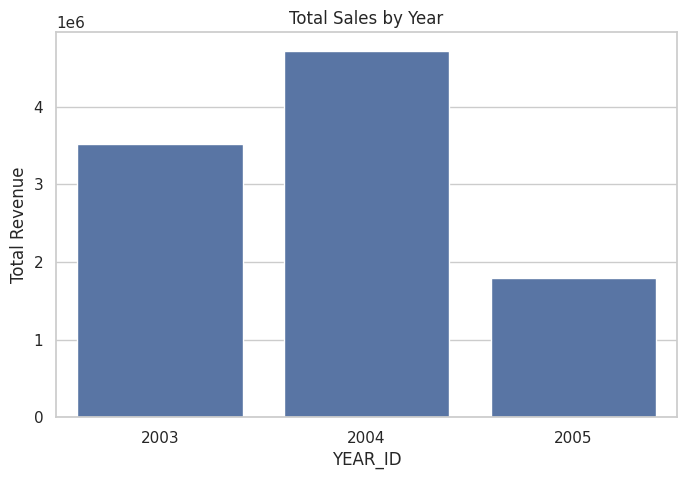

In [15]:
# 5. Visualizations

sales_by_year = df.groupby('YEAR_ID')['SALES'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=sales_by_year, x='YEAR_ID', y='SALES')
plt.title("Total Sales by Year")
plt.ylabel("Total Revenue")
plt.show()

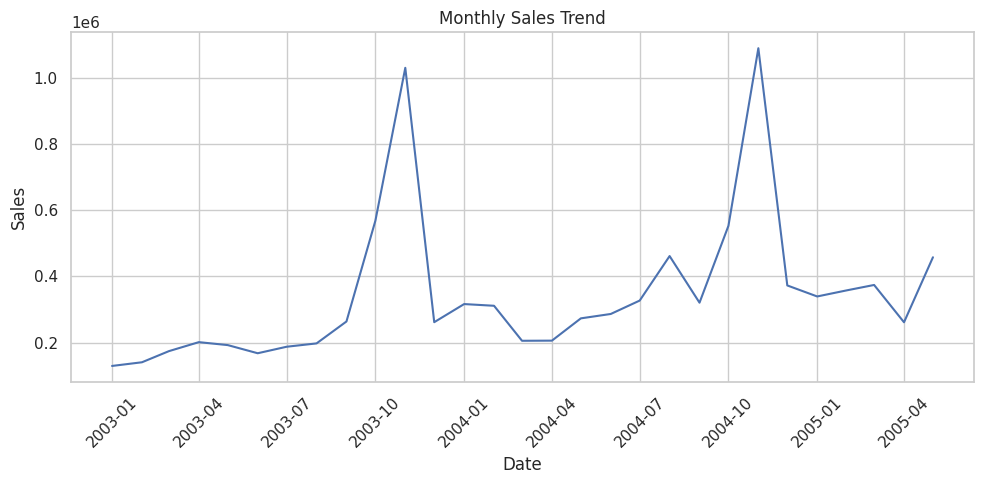

In [16]:
monthly_sales = df.groupby(['YEAR_ID', 'MONTH'])['SALES'].sum().reset_index()
monthly_sales['DATE'] = pd.to_datetime(monthly_sales['YEAR_ID'].astype(str) + '-' + monthly_sales['MONTH'].astype(str))

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='DATE', y='SALES')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-17-1454262730>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='PRODUCTLINE', y='SALES', estimator=sum, ci=None)


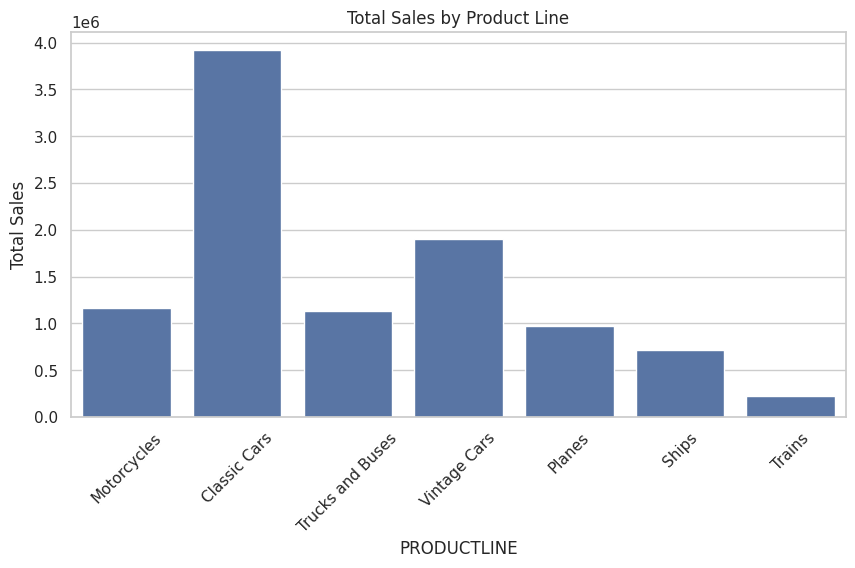

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='PRODUCTLINE', y='SALES', estimator=sum, ci=None)
plt.title("Total Sales by Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

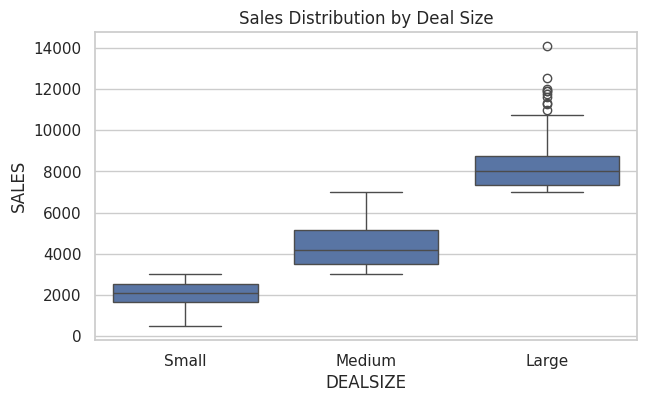

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title("Sales Distribution by Deal Size")
plt.show()

<Axes: xlabel='STATUS', ylabel='SALES'>

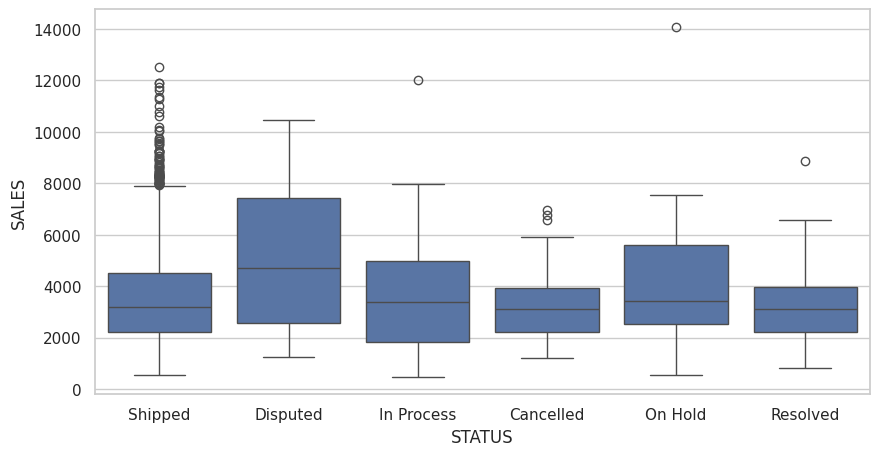

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='STATUS', y='SALES', data=df)

<Axes: xlabel='PRODUCTLINE', ylabel='SALES'>

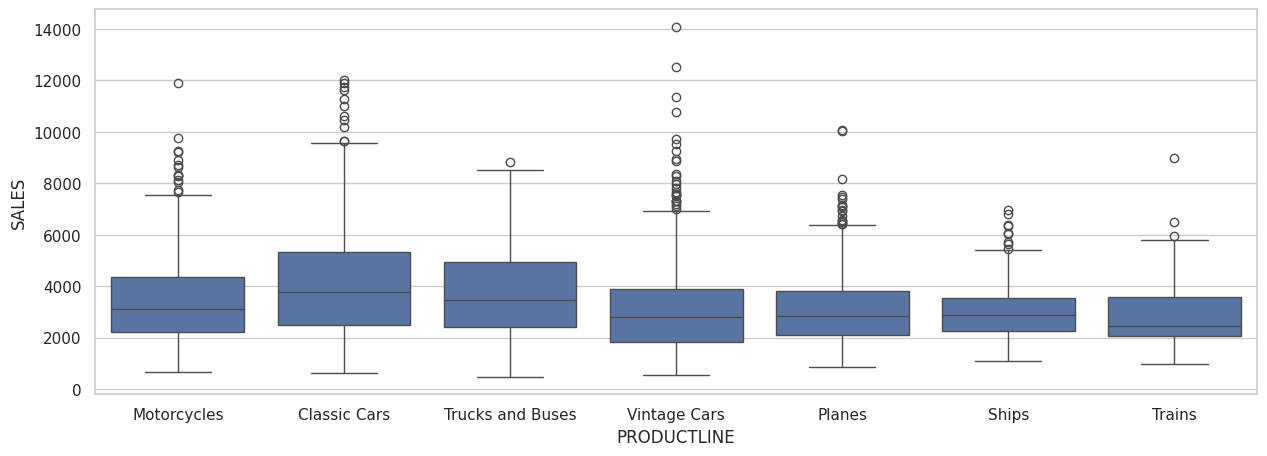

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)

In [26]:
# 6. Insights Summary

print("""
🔍 Key EDA Insights:

1. 📦 Data Completeness & Cleaning:
   - The dataset has 2,823 rows and 25 columns.
   - Columns like `ADDRESSLINE2` and `TERRITORY` are >80% missing and were removed to reduce noise.
   - `ORDERDATE` was successfully converted to datetime, enabling monthly and yearly trend analysis.

2. 📅 Temporal Sales Trends:
   - Sales show a consistent growth trajectory with peaks in 2004.
   - Monthly revenue analysis reveals seasonal spikes — possibly influenced by product demand cycles or holiday periods.
   - Trend plots indicate business momentum and can help in sales forecasting.

3. 📈 Product Performance:
   - Product lines like **Classic Cars** and **Vintage Cars** are the top revenue contributors.
   - `PRODUCTLINE` clearly segments high vs. low revenue categories, making it a strong candidate for modeling (e.g., predicting high-value products).

4. 🛒 Deal Size Impact:
   - Larger deal sizes (labeled as ‘Large’) tend to generate higher sales but also show higher variance.
   - A box plot comparison reveals that 'Small' deals are more predictable, while 'Large' deals are more volatile — useful insight for risk-based pricing or inventory planning.

5. 🔍 Categorical Feature Relevance:
   - Categorical variables like `STATUS` (order status) and `PRODUCTLINE` appear to influence `SALES`.
   - These variables can be transformed into numerical format and used in future models (e.g., regression or classification).

Next Steps:
✅ Save this cleaned dataset
✅ Consider creating a dashboard or applying time series models for forecasting
✅ Use `PRODUCTLINE`, `DEALSIZE`, and `STATUS` as features in supervised learning tasks
""")



🔍 Key EDA Insights:

1. 📦 Data Completeness & Cleaning:
   - The dataset has 2,823 rows and 25 columns.
   - Columns like `ADDRESSLINE2` and `TERRITORY` are >80% missing and were removed to reduce noise.
   - `ORDERDATE` was successfully converted to datetime, enabling monthly and yearly trend analysis.

2. 📅 Temporal Sales Trends:
   - Sales show a consistent growth trajectory with peaks in 2004.
   - Monthly revenue analysis reveals seasonal spikes — possibly influenced by product demand cycles or holiday periods.
   - Trend plots indicate business momentum and can help in sales forecasting.

3. 📈 Product Performance:
   - Product lines like **Classic Cars** and **Vintage Cars** are the top revenue contributors.
   - `PRODUCTLINE` clearly segments high vs. low revenue categories, making it a strong candidate for modeling (e.g., predicting high-value products).

4. 🛒 Deal Size Impact:
   - Larger deal sizes (labeled as ‘Large’) tend to generate higher sales but also show higher varia